In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV




df=pd.read_csv('../data/data_clean.csv')

df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0


In [2]:
gas_type_diccionario= {'E10':0, 'SP98':1}
df['gas_type'] = df['gas_type'].map(gas_type_diccionario) 


In [3]:
df.drop('temp_inside',axis=1, inplace=True)

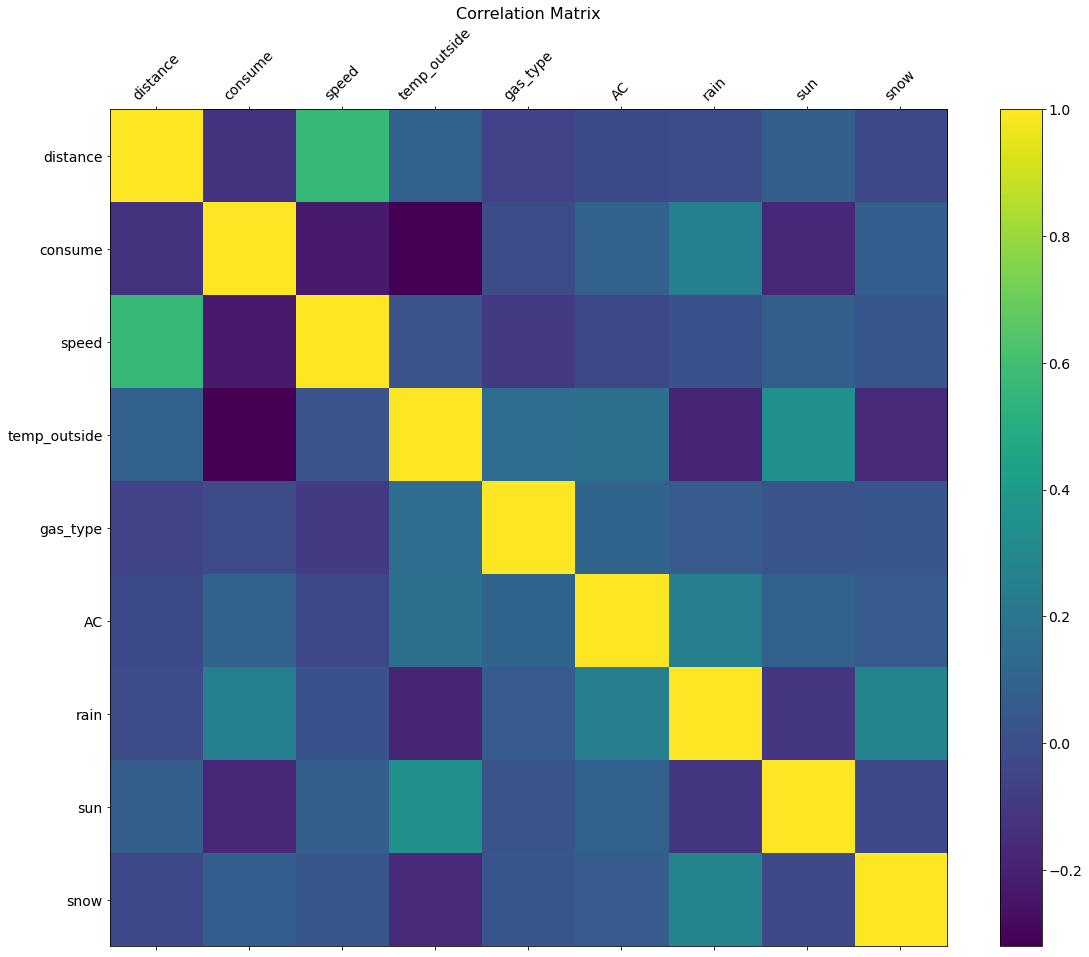

In [4]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.astype(float).corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [7]:
y=df.consume
X=df.drop('consume',axis=1)

In [8]:
y

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [9]:
X

,distance,speed,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,26,12,0,0.0,0.0,0.0,0
1,12.0,30,13,0,0.0,0.0,0.0,0
2,11.2,38,15,0,0.0,0.0,0.0,0
3,12.9,36,14,0,0.0,0.0,0.0,0
4,18.5,46,15,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
383,16.0,39,18,1,0.0,0.0,0.0,0
384,16.1,38,31,1,1.0,0.0,0.0,0
385,16.0,45,19,1,0.0,0.0,0.0,0
386,15.4,42,31,1,1.0,0.0,0.0,0


In [10]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2, random_state=27)

# Evaluador de modelos

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('====================')
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("MAE: ", metrics.mean_absolute_error(y_true, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_true,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_true,y_pred)))
    print("R2: ", metrics.r2_score(y_true,y_pred))
    return  metrics.mean_squared_error(y_true,y_pred)

# Ranmos Forest Random Search 

## Generar Modelo

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs = 1)


## Entrenar Modelo

In [19]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.600 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.550 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.678 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.547 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.079 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.595 total time=   1.6s
[CV 2/5] END boots

[CV 4/5] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.501 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.150 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.565 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.541 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.534 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.518 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.537 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.539 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.521 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=-0.022 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.476 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400;, score=0.522 total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=sqrt, min_sampl

[CV 5/5] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=0.027 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.566 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.544 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.545 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=0.508 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-0.036 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=50, max_features=sqrt, min_samp

[CV 4/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.568 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=0.043 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.463 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.508 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.695 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.568 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf

[CV 2/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.612 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.475 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=0.116 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000;, score=-0.274 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.590 total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400;, score=0.533 total time=   1.2s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, 

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200;, score=-0.456 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.585 total time=   1.2s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.539 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.713 total time=   1.4s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.545 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600;, score=0.012 total time=   1.4s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, mi

[CV 3/5] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.664 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.420 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600;, score=0.051 total time=   1.7s
[CV 1/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.592 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.534 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.683 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_sample

[CV 1/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.554 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.548 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.642 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=0.508 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=-0.048 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=0.607 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=sqrt, min_sam

[CV 4/5] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.225 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-0.456 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.549 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.224 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.085 total time=   0.8s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000;, score=0.143 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_sa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

## Evaluar Modelo

In [40]:
y_predict=rf_random.predict(X_test)

random_forest=y_predict,evaluate(rf_random, X_test, y_true)



Model Performance
Accuracy = 90.58%.
MAE:  0.4336818260378828
MSE:  0.3580087411209271
RMSE:  0.5983383166076923
R2:  0.40065237056714054


A pesar de que parece una variable importante vamos a retirar la temp exterior



# Gradient boost

In [51]:
gbr = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

In [52]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_features='auto', n_estimators=10,
                          random_state=123)

## Predicción

In [53]:
y_predict = gbr.predict(X = X_test)

## Evaluación

In [54]:
gradient_boost=y_predict,evaluate(gbr, X_test, y_true)


Model Performance
Accuracy = 88.67%.
MAE:  0.4336818260378828
MSE:  0.3580087411209271
RMSE:  0.5983383166076923
R2:  0.40065237056714054


# Gradient boost HIPER PARÁMETROS

## Buscamos el profundidad del arbol evitando overfittind

Valor óptimo de n_estimators: 101


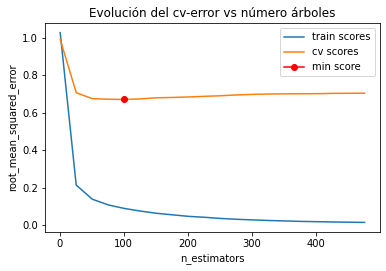

In [61]:

train_scores = []
cv_scores    = []

estimator_range = range(1, 500, 25)

for n_estimators in estimator_range:
    
    modelo = GradientBoostingRegressor(
                n_estimators = n_estimators,
                loss         = 'ls',
                max_features = 'auto',
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = metrics.mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = True
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5,
                n_jobs    = -1,
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [68]:

param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

gbr = GradientBoostingRegressor(n_estimators = 101, validation_fraction = 0.1, n_iter_no_change = 5, tol= 0.0001)
grid = GridSearchCV(
        estimator  = gbr,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = - 1,
        cv         = 5, 
        refit      = True,
        verbose    = 3,
       )


In [69]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=101, n_iter_no_change=5)

## Predicción

In [70]:
y_predict = gbr.predict(X = X_test)

## Evaluación

In [71]:
gradient_boost=y_predict,evaluate(gbr, X_test, y_true)


Model Performance
Accuracy = 90.21%.
MAE:  0.4336818260378828
MSE:  0.3580087411209271
RMSE:  0.5983383166076923
R2:  0.40065237056714054
